# A look into who survived the sinking of the Titanic

This analysis explores a sample of Titanic passengers for various insights into who surived. It will answer the following questions. Which factors made a passenger more likely to survive the sinking of the Titanic? And for those who survived, what did the breakdown look like for the same factors?

This is a tentative work in progress.

In [134]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
   
def survival_pie_chart(title, survival_rate):
    '''
    Creates a simple pie chart that displays survival and non survival rates.
    Takes a title and a survival_rate.
    '''
    labels = 'Survived', 'Perished'
    sizes = [survival_rate*100,(1-survival_rate)*100]
    colors = ["#c6e2ff", "#990000"]
    
    plt.pie(
        sizes,
        labels=labels,
        shadow=False,
        colors=colors,
        explode=(0, 0),
        startangle=90,
        autopct='%1.1f%%'
        )
    
    plt.title(title);

    plt.axis('equal')

    plt.tight_layout()
    plt.show()
    
def get_survivor_rate_by_category(passengers, column):
    '''
    returns a DataFrame w/ survival rate for a given column of data
    '''
    return passengers.groupby(column).mean()['Survived']

passenger_data = pd.read_csv('titanic-data.csv', index_col='PassengerId')

#passenger_data.head(5)

## Overall survival rate

As an introduction to the analysis, here's the overall survival rate for the sample

### 38.3% of passengers survived

In [135]:
# note: for survival rate,
#       it's safe to use the mean() value of the Survived column,
#       since 1 represents survived and 0 represents didn't survive,
#       and the mean simply adds those values up and divides by the total
#       number of passengers

overall_survival_rate = passenger_data.mean()['Survived']

print "overall survival rate:"
print passenger_data.mean()['Survived']

overall survival rate:
0.383838383838


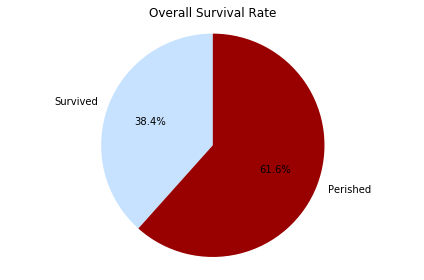

In [136]:
survival_pie_chart('Overall Survival Rate', overall_survival_rate)

In [137]:
survival_rate_by_sex = get_survivor_rate_by_category(passenger_data,'Sex')
print survival_rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


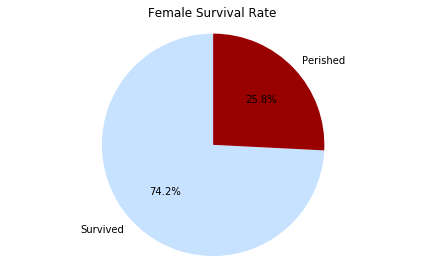

In [138]:
survival_pie_chart('Female Survival Rate', survival_rate_by_sex['female'])

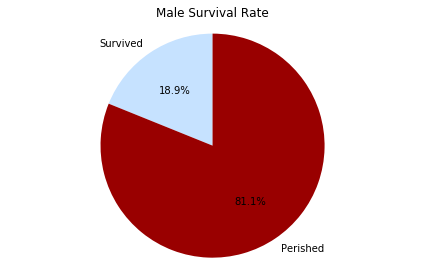

In [139]:
survival_pie_chart('Male Survival Rate', survival_rate_by_sex['male'])

## Survival rate by age

This analysis breaks passengers into three age groups: children (0-14 years old), adolescents (14-20 years old), and adults (21+ years old). This is an arbitrary distinction that probably reflects a modern bias, but hopefully it yields equally interesting insights.

### 58.4% of children survived

### 36.3% of adolescents survived

### 38.9% of adults survived

In [140]:
# note: while the data has a number of empty values for age,
#       the mean() function ignores those, so we can safely
#       calculate it without modifying that column

# data wrangling: added a new column 'age_group' to passenger_data
#                 so that we can easily calculate the mean survival rate

# define the bin values and group names
bins = [0,14,20,100]
group_names = ['Children', 'Adolescents', 'Adults']

# create a new column 'age_group' and add it to the data
age_group = pd.cut(passenger_data['Age'], bins, labels=group_names)
passenger_data['age_group'] = age_group

# get survival rate by age group
survival_rate_by_age = get_survivor_rate_by_category(passenger_data,'age_group')
print survival_rate_by_age

age_group
Children       0.584416
Adolescents    0.362745
Adults         0.388785
Name: Survived, dtype: float64


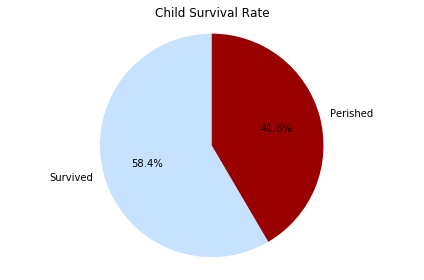

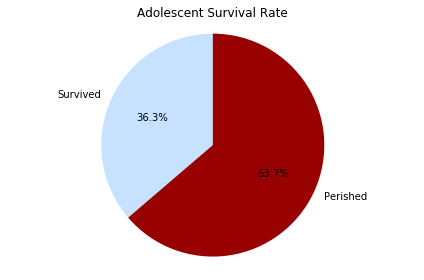

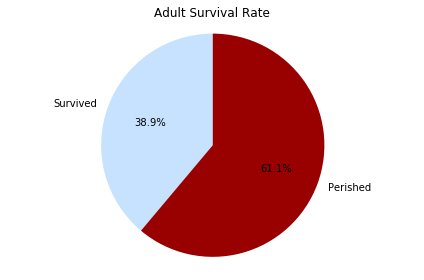

In [141]:
survival_pie_chart('Child Survival Rate', survival_rate_by_age[0])
survival_pie_chart('Adolescent Survival Rate', survival_rate_by_age[1])
survival_pie_chart('Adult Survival Rate', survival_rate_by_age[2])

## Survival by ticket class

Passengers could purchase three types of tickets to board the Titanic: first class, second class, and third class. Here's the breakdown of the survival rate by ticket class.

### 62.9% of first class ticket holders survived

### 47.3% of second class ticket holders survived

### 24.2% of third class ticket holders survived

In [142]:
survival_rate_by_ticket_class = get_survivor_rate_by_category(passenger_data,'Pclass')
print survival_rate_by_ticket_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


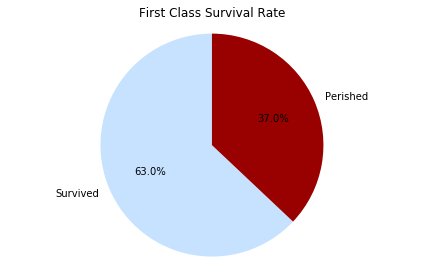

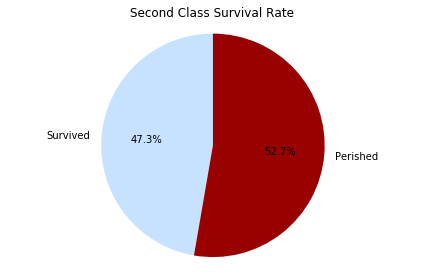

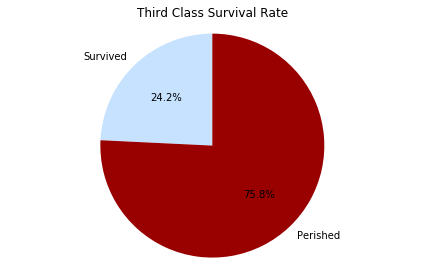

In [143]:
survival_pie_chart('First Class Survival Rate', survival_rate_by_ticket_class[1])
survival_pie_chart('Second Class Survival Rate', survival_rate_by_ticket_class[2])
survival_pie_chart('Third Class Survival Rate', survival_rate_by_ticket_class[3])

## Remarks

It's clear from the above breakdown that certain groups were more likely to survive. Women, children, and first class passengers were much more likely to survive the sinking.

Does that paint the whole picture, though? Perhaps there's more going on here. To explore further, we'll look at the breakdown of those that actually survived.

# The breakdown of those who survived

In [144]:
from __future__ import division

# data wrangling: create a new DataFrame of just survivors
survivors = passenger_data[passenger_data['Survived'] == 1]

## Of those who survived, the ticket class breakdown

Of those who survived, 39.8% were first class, 25.4% were second class, 34.8% were third class.

In [145]:
print len(survivors[survivors['Pclass'] == 1]) / len(survivors)
print len(survivors[survivors['Pclass'] == 2]) / len(survivors)
print len(survivors[survivors['Pclass'] == 3]) / len(survivors)

0.397660818713
0.254385964912
0.347953216374


## Of those who survived, the sex breakdown

Of those who survived, 31.9% were male and 68.1% were female.

In [146]:
print len(survivors[survivors['Sex'] == 'male']) / len(survivors)
print len(survivors[survivors['Sex'] == 'female']) / len(survivors)

0.318713450292
0.681286549708


## Of those who survived, the age breakdown

Of those who survived, 15.5% where children, 12.7% were adolescents, and 71.1% were adults.

In [148]:
# data wrangling: since there's a lot of missing age data (~17% of survivors),
#                 we'll remove the rows without age data
survivors_with_age_data = survivors.dropna(subset=['Age'])

print len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Children']) / len(survivors_with_age_data)
print len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Adolescents']) / len(survivors_with_age_data)
print len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Adults']) / len(survivors_with_age_data)

0.155172413793
0.127586206897
0.71724137931


## Remarks

From this perspective, the survivors look a bit different.

For the different ticket classes, things look a bit more even. The first class ticket holders do still make up a majority of the survivors, though. And considering they probably made up a minority of total passengers, they still seem to have had a priority.

Females did much better than males. Their survival rate is double.

The age breakdown seems interesting. While adults most certainly made up a majority of passengers, they also made up over 70% of survivors.

In conclusion, the trends make sense. The groups that you'd expect more likely to survive, did.